In [1]:
#importing the key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset into a dataframe
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#shape of the dataframe
df.shape

(730, 16)

In [4]:
#details on the data provided
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Confirm that there is no non-null data in the dataframe
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# data dictionary of day.csv for quick reference:
# instant: record index
# dteday : date
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
# yr : year (0: 2018, 1:2019)
# mnth : month ( 1 to 12)
# holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# weekday : day of the week
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temp : temperature in Celsius
# atemp: feeling temperature in Celsius
# hum: humidity
# windspeed: wind speed
# casual: count of casual users
# registered: count of registered users
# cnt: count of total rental bikes including both casual and registered

In [7]:
#Identifying Numeric and Catgeorical Variables based on the number of unique values
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
#separating the numerical columns and categorical columns based on the unique values and data dictionary 
num_cols=['instant','dteday','temp','atemp','hum','windspeed','casual','registered','cnt']
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [9]:
#Reducing the no. of columns for analysis based on logical reasoning of the data dictionary and unique values
# Instant and dteday are unique for every record in the data, so we can drop them for the analysis, so dropping them from num_cols
# cnt is the target variable which is a sum of 'casual' and 'registered', so we can drop these 2 variables from num_col too
# not-dropping anything from the categorical data cat_cols
num_cols=['temp','atemp','hum','windspeed','cnt']

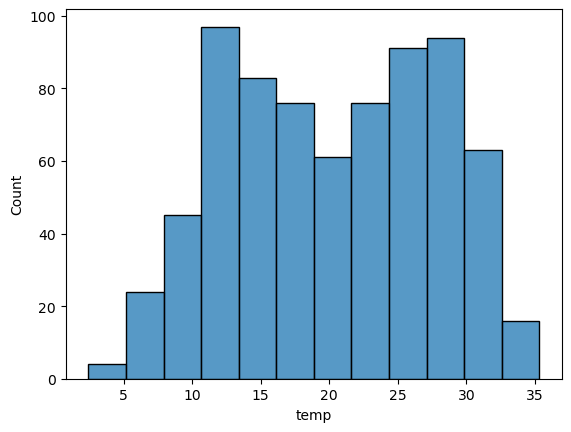

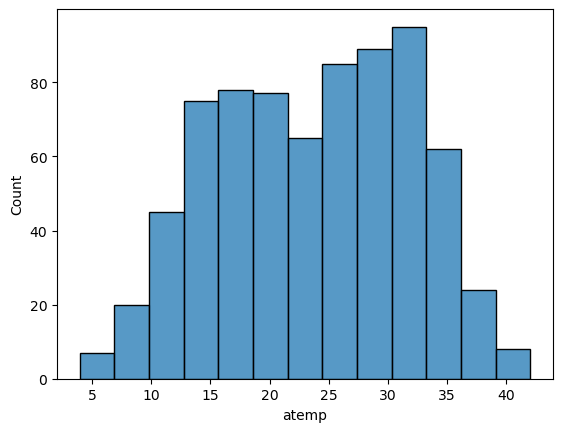

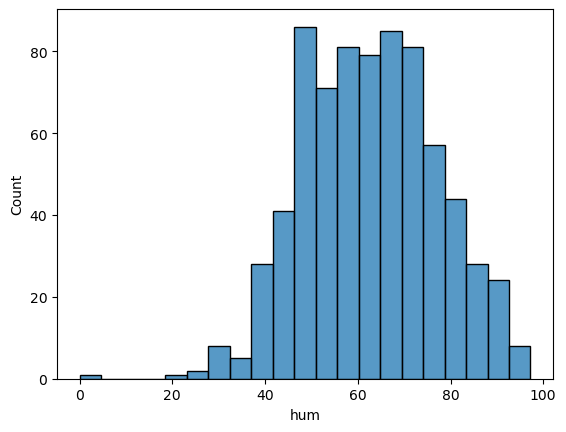

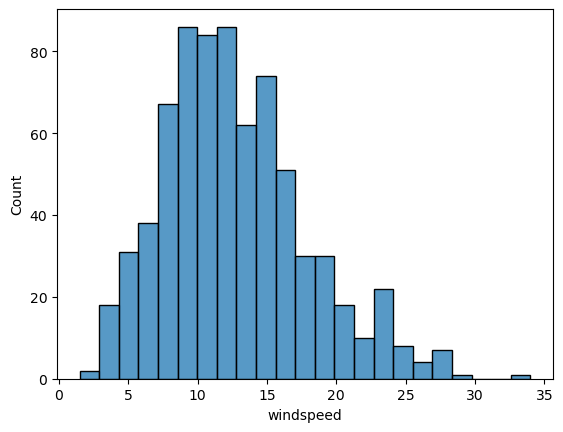

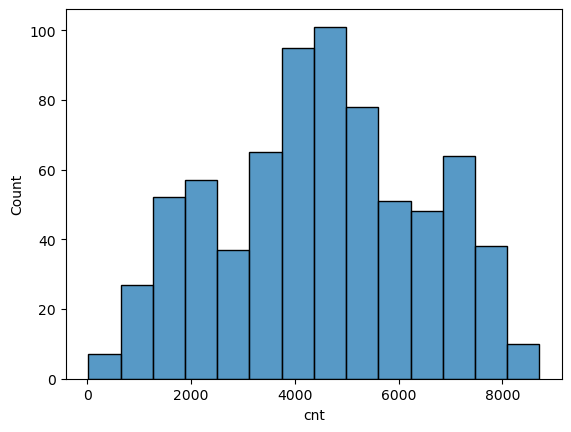

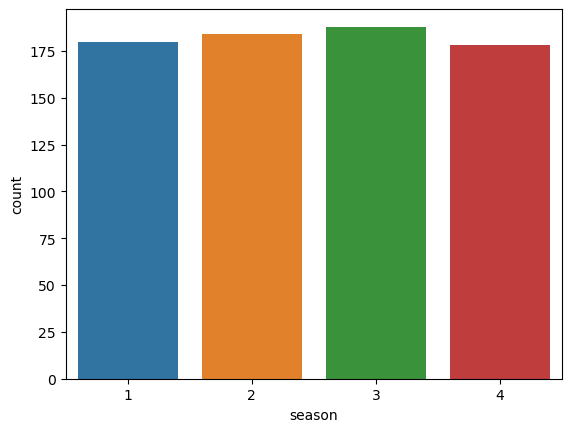

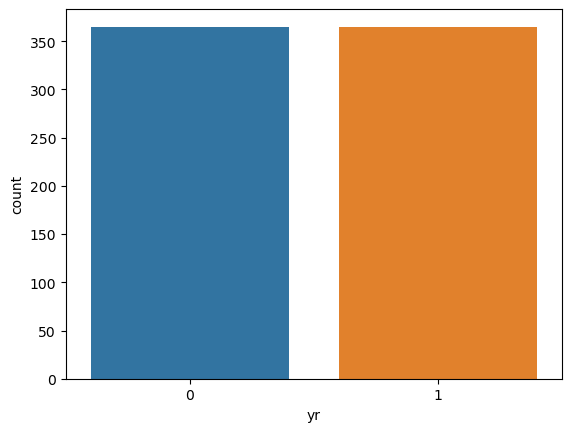

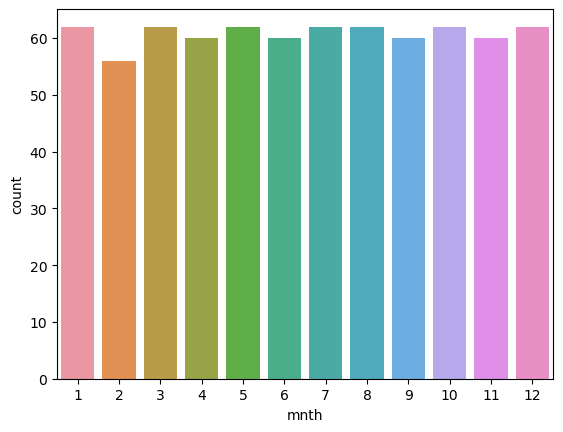

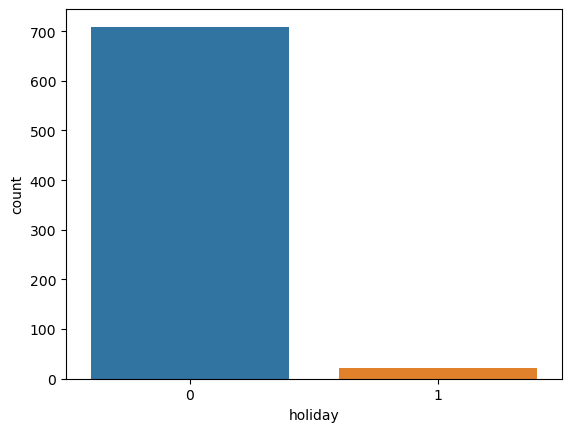

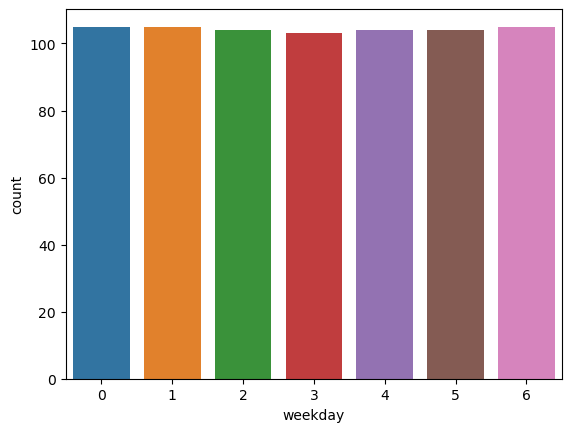

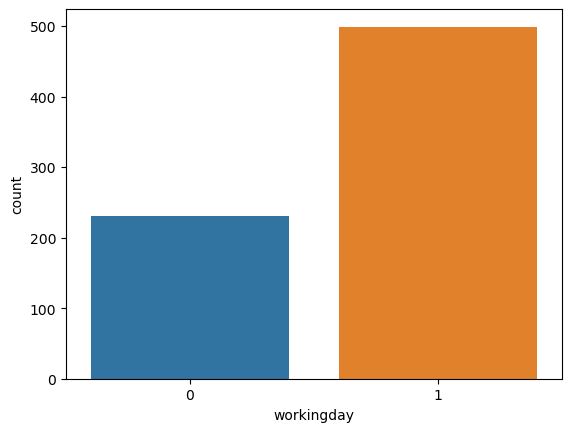

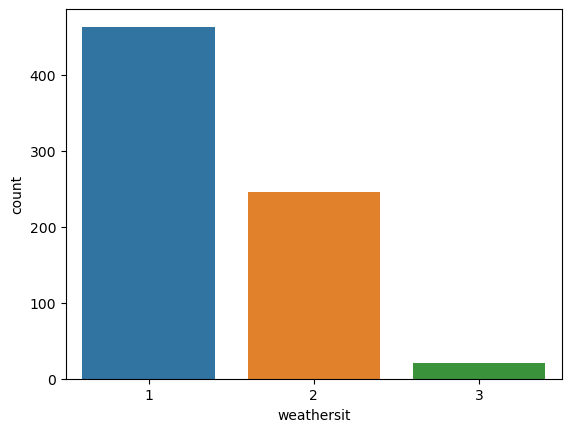

In [10]:
# doing univariate analysis through histogram for numeric variables and countplot for categorical variables
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()
for j in cat_cols:
    sns.countplot(x=df[j])
    plt.show()

C:\Users\ushas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


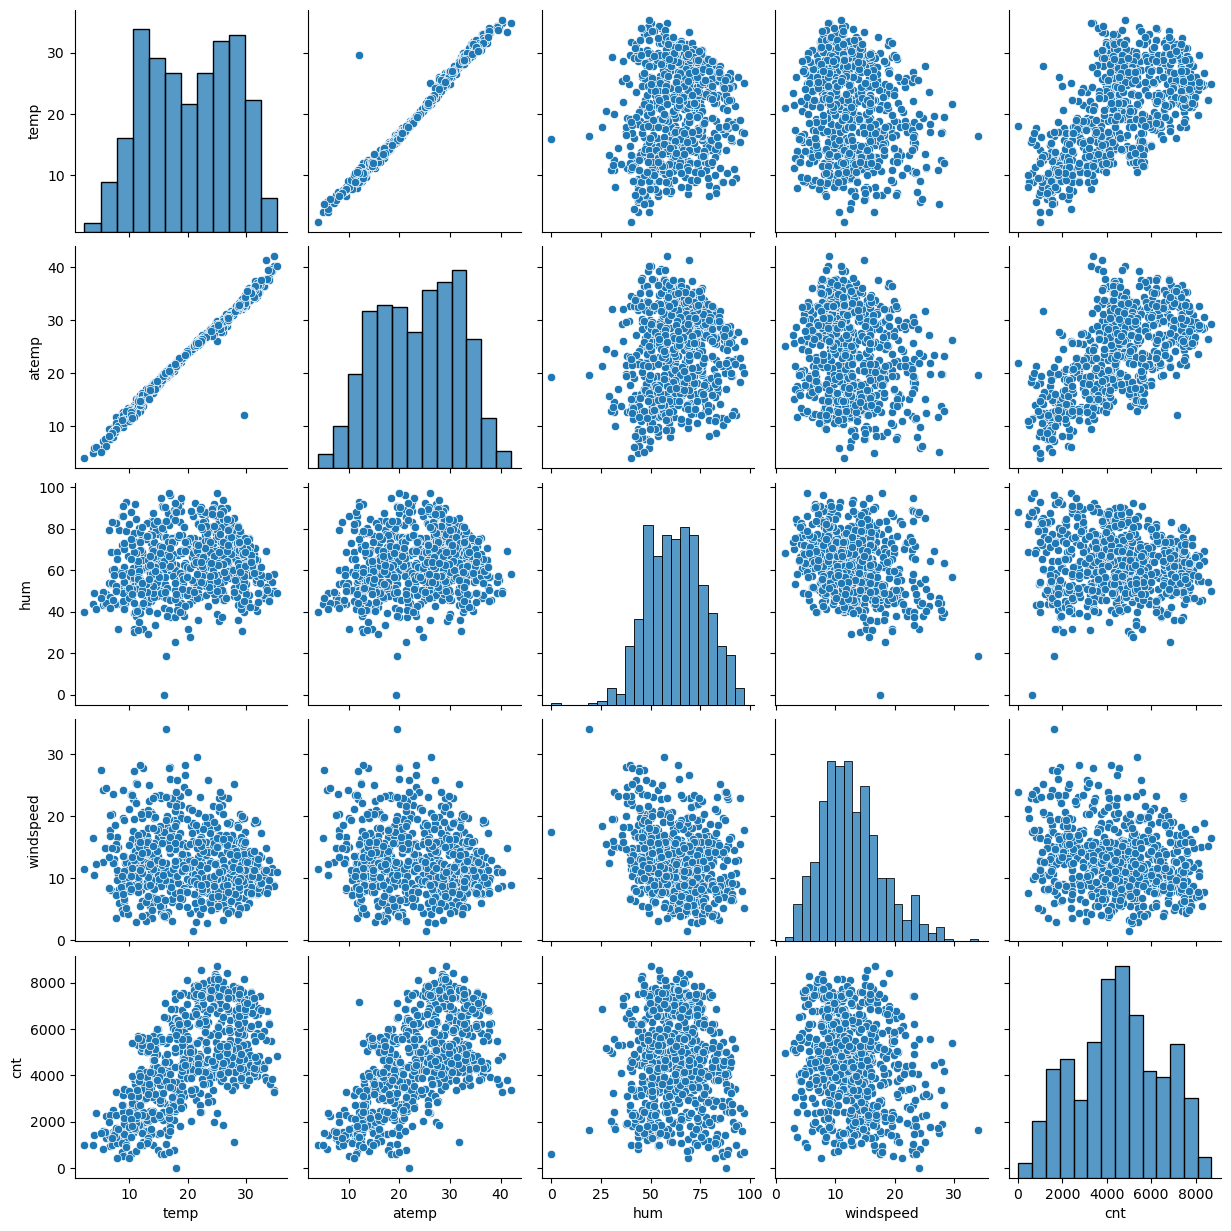

In [11]:
# key output of the univariate analysis:
# 1) All the numerical variables seems to have a good representation in the data set and there are no causes of concern. 
# 2) Amongst numrical variables, 'temp' and 'atemp' data spread seems to be similar. Need to check the correlation in bivariate analysis.
# 3) All the categorical varaibles seems to be have a good representation in the data set except:
#      i) when 'holiday' = 1, and
#      ii) when 'weathersit' =3

# doing bivariate analysis for the numerical columns through a pairplot
sns.pairplot(df[num_cols])
plt.show()

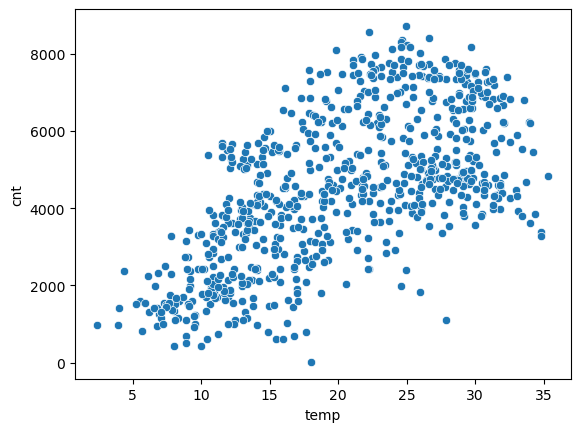

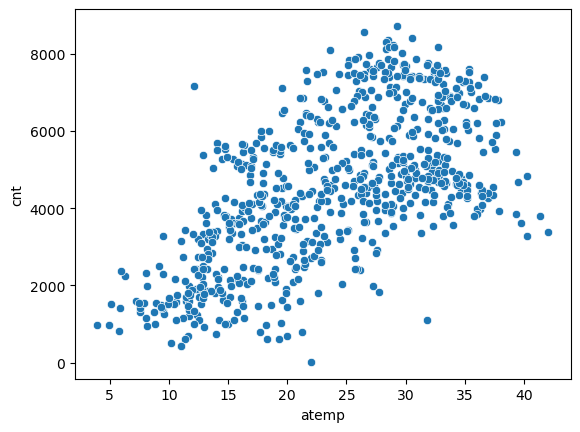

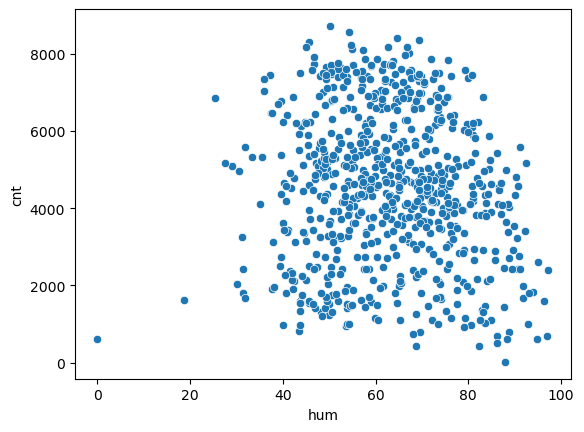

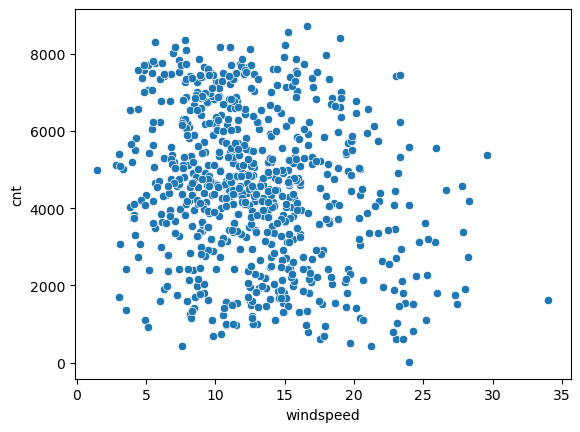

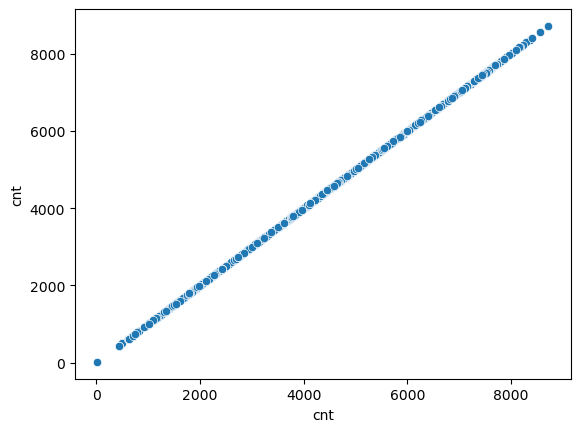

In [12]:
# key output of the bi-variate analysis:
# 1) We cab see that 'temp' and 'atemp' is absolutely correlated, so we can drop on one of these columns. 
# 2) The target variable 'cnt' seems to be linearly related with 'temp' and 'atemp'
# Plotting the numeric variables against target 'cnt' and plotting a heatmap to re-validate the conclusions above
for i in num_cols:
    sns.scatterplot(x=df[i], y=df['cnt'])
    plt.show()

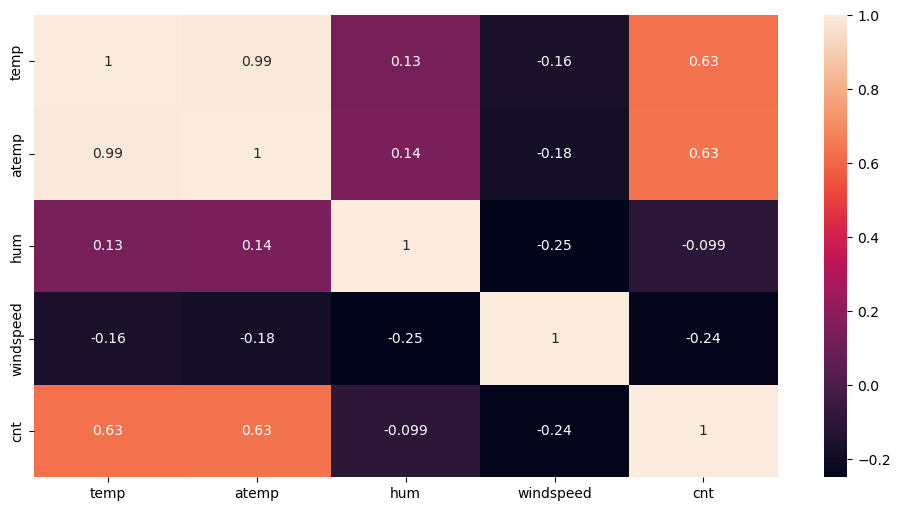

In [13]:
# there seems to be negative correlation between target variable 'cnt' and humidity 'hum'
# plotting the heatmap for multivariate analysis
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

In [14]:
# dropping 'atemp' from the numeric variables for analysis
num_cols=['temp','hum','windspeed','cnt']

In [15]:
#one hot encoding - for categorical variables which have more than 2 categories we need to create a dummy variable
df[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [16]:
#num of dummies is n-1, create the dummy columns for 'season', 'mnth', 'weekday' and 'weathersit' variable as it has 4,12,7 and 3 types of categorical data
dum1=pd.get_dummies(df['season'], drop_first = True, dtype =int)
dum2=pd.get_dummies(df['mnth'], drop_first = True, dtype =int)
dum3=pd.get_dummies(df['weekday'], drop_first = True, dtype =int)
dum4=pd.get_dummies(df['weathersit'], drop_first = True, dtype =int)

In [18]:
# getting the shape of the dummy column for 'season'
dum1.shape

(730, 3)

In [19]:
# getting the shape of the dummy column for 'mnth'
dum2.shape

(730, 11)

In [20]:
# getting the shape of the dummy column for 'weekday'
dum3.shape

(730, 6)

In [21]:
# getting the shape of the dummy column for 'weathersit'
dum4.shape

(730, 2)

In [22]:
dum1.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [23]:
dum2.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [24]:
dum3.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [25]:
dum4.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [27]:
#Need to rename the columns to make it relevant while concatenating in the main data frame
dum1.columns =['sn2','sn3','sn4']
dum1.head()

,sn2,sn3,sn4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [28]:
#Renaming the columns in the other dummies
dum2.columns =['mn2','mn3','mn4','mn5','mn6','mn7','mn8','mn9','mn10','mn11','mn12']
dum2.head()

,mn2,mn3,mn4,mn5,mn6,mn7,mn8,mn9,mn10,mn11,mn12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [29]:
#Renaming the columns in the other dummies
dum3.columns =['wk1','wk2','wk3','wk4','wk5','wk6']
dum3.head()

,wk1,wk2,wk3,wk4,wk5,wk6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [30]:
#Renaming the columns in the other dummies
dum4.columns =['wth2','wth3']
dum4.head()

,wth2,wth3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [34]:
# Cocatenating the dummy variables with the selected numeric variables to create the dataframe for analysis
df2=pd.concat([df[num_cols],dum1], axis=1)
df2.head()

,temp,hum,windspeed,cnt,sn2,sn3,sn4
0,14.110847,80.5833,10.749882,985,0,0,0
1,14.902598,69.6087,16.652113,801,0,0,0
2,8.050924,43.7273,16.636703,1349,0,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0


In [35]:
#Concatenating all the remaining dummy variables
df2=pd.concat([df2,dum2], axis=1)
df2=pd.concat([df2,dum3], axis=1)
df2=pd.concat([df2,dum4], axis=1)
df2.head()

,temp,hum,windspeed,cnt,sn2,sn3,sn4,mn2,mn3,mn4,...,mn11,mn12,wk1,wk2,wk3,wk4,wk5,wk6,wth2,wth3
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
#checking the shape of new data frame
df2.shape

(730, 26)

In [37]:
#checking the columns of new dataframe
df2.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'sn2', 'sn3', 'sn4', 'mn2', 'mn3',
       'mn4', 'mn5', 'mn6', 'mn7', 'mn8', 'mn9', 'mn10', 'mn11', 'mn12', 'wk1',
       'wk2', 'wk3', 'wk4', 'wk5', 'wk6', 'wth2', 'wth3'],
      dtype='object')

In [38]:
# Dataset is ready
# Start of Modeling:
# Defining X and y:
X=df2.drop('cnt',axis=1)
y=df2['cnt']

In [39]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [40]:
X_train.head()

,temp,hum,windspeed,sn2,sn3,sn4,mn2,mn3,mn4,mn5,...,mn11,mn12,wk1,wk2,wk3,wk4,wk5,wk6,wth2,wth3
367,6.150000,44.1250,24.499957,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
648,17.835000,46.3333,12.166932,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
44,17.015000,37.5833,27.999836,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
705,13.154153,76.4167,8.750200,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
379,6.833347,41.9167,16.834286,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Getting the shape of the train and the test data
print(X_train.shape)
print(X_test.shape)

(584, 25)
(146, 25)


In [42]:
#Scaling the data usinf standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  #as test data is unseen data so we cannot run fit on it, only transform

In [43]:
X_train_df=pd.DataFrame(X_train, columns=X.columns)
X_test_df=pd.DataFrame(X_test, columns=X.columns)

In [44]:
X_train_df.head()

,temp,hum,windspeed,sn2,sn3,sn4,mn2,mn3,mn4,mn5,...,mn11,mn12,wk1,wk2,wk3,wk4,wk5,wk6,wth2,wth3
0,-1.884077,-1.351866,2.236778,-0.572078,-0.579987,-0.577350,-0.281926,-0.31593,-0.288943,-0.30933,...,-0.295843,-0.309330,-0.418390,2.546994,-0.426833,-0.395519,-0.375000,-0.421212,-0.721688,-0.167836
1,-0.306750,-1.193941,-0.119144,-0.572078,-0.579987,1.732051,-0.281926,-0.31593,-0.288943,-0.30933,...,-0.295843,-0.309330,-0.418390,-0.392620,-0.426833,2.528321,-0.375000,-0.421212,-0.721688,-0.167836
2,-0.417439,-1.819690,2.905344,-0.572078,-0.579987,-0.577350,3.547026,-0.31593,-0.288943,-0.30933,...,-0.295843,-0.309330,2.390114,-0.392620,-0.426833,-0.395519,-0.375000,-0.421212,-0.721688,-0.167836
3,-0.938605,0.957450,-0.771827,-0.572078,-0.579987,1.732051,-0.281926,-0.31593,-0.288943,-0.30933,...,-0.295843,3.232798,-0.418390,-0.392620,-0.426833,-0.395519,2.666667,-0.421212,1.385641,-0.167836
4,-1.791834,-1.509791,0.772439,-0.572078,-0.579987,-0.577350,-0.281926,-0.31593,-0.288943,-0.30933,...,-0.295843,-0.309330,-0.418390,-0.392620,-0.426833,-0.395519,-0.375000,-0.421212,-0.721688,-0.167836


In [45]:
#import RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
#Feature Selection
# Starting with 10 features
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=10)

In [47]:
#fitting the model for the 10 features on the data
selector = selector.fit(X_train_df, y_train)
selector.support_

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True,  True])

In [48]:
#Seeing the columns as per the selected features
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['temp', 'hum', 'windspeed', 'sn2', 'sn4', 'mn7', 'mn9', 'wk3', 'wth2',
       'wth3'],
      dtype='object')


In [49]:
# Now wil evaluate the model manually based on the selected features
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

In [50]:
#importing stats model and adding the constant to X
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [51]:
#Running the 1st version of the model and looking at its summary
model1=sm.OLS(np.array(y_train), X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     84.81
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.56e-106
Time:                        14:20:37   Log-Likelihood:                -4989.6
No. Observations:                 584   AIC:                         1.000e+04
Df Residuals:                     573   BIC:                         1.005e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     51.911     86.788      0.000    4403.308    4607.226
temp        1336.7624     65.270     20.480      0.000    1208.564    1464.961
hum         -398.2557     71.223     -5.592      0.000    -538.145    -258.366
windspeed   -293.5190     56.449     -5.200      0.000    -404.392    -182.646
sn2          321.8284     60.345      5.333      0.000     203.305     440.352
sn4          578.3733     58.413      9.902      0.000     463.644     693.102
mn7         -131.9523     62.519     -2.111      0.035    -254.747      -9.158
mn9          196.3442     56.639      3.467      0.001      85.098     307.591
wk3           57.0569     52.308      1.091      0.276     -45.682     159.796
wth2        -104.6438     65.019     -1.609      0.108    -232.348      23.061
wth3        -323.8909     57.929     -5.591      0.000    -437.669    -210.113
==============================================================================
Omnibus:                       24.045   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.169
Skew:                           0.082   Prob(JB):                      0.00376
Kurtosis:                       2.342   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# The 1st model has F-stat less that 0.05, adj R2 is 0.59 but few variables like 'wk3' and 'wth2' have p value >0.05
# p-value should be less than 0.05
# VIF should be less than 5 
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF']=[variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,temp,1.580934
2,hum,1.882440
3,windspeed,1.182496
4,sn2,1.351324
5,sn4,1.266182
6,mn7,1.450465
7,mn9,1.190476
8,wk3,1.015357
9,wth2,1.568780


In [53]:
# VIF for all variables is less than 5, so no action
# Dropping variable 'wk3' which had the highest p value of 0.276
X_train_sm = X_train_sm.drop(['wk3'], axis =1)
X_test_sm = X_test_sm.drop(['wk3'], axis =1)

In [54]:
# Developing the 2nd version of the model for best fit
model2=sm.OLS(np.array(y_train), X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     94.07
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.42e-107
Time:                        14:27:06   Log-Likelihood:                -4990.2
No. Observations:                 584   AIC:                         1.000e+04
Df Residuals:                     574   BIC:                         1.004e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     51.920     86.774      0.000    4403.292    4607.243
temp        1339.5094     65.233     20.534      0.000    1211.386    1467.633
hum         -397.3420     71.230     -5.578      0.000    -537.245    -257.439
windspeed   -294.8299     56.446     -5.223      0.000    -405.696    -183.964
sn2          321.2554     60.352      5.323      0.000     202.717     439.794
sn4          577.0337     58.409      9.879      0.000     462.311     691.756
mn7         -135.4037     62.449     -2.168      0.031    -258.061     -12.747
mn9          195.7253     56.646      3.455      0.001      84.467     306.984
wth2        -105.6008     65.024     -1.624      0.105    -233.314      22.113
wth3        -318.0182     57.687     -5.513      0.000    -431.322    -204.714
==============================================================================
Omnibus:                       26.554   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.808
Skew:                           0.078   Prob(JB):                      0.00273
Kurtosis:                       2.321   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# The 2nd model has F-stat less that 0.05, adj R2 is 0.59 but one variable 'wth2' have p value >0.05
# p-value should be less than 0.05
# VIF should be less than 5 
# Calculating VIF again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF']=[variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,temp,1.578581
2,hum,1.882180
3,windspeed,1.181960
4,sn2,1.351222
5,sn4,1.265622
6,mn7,1.446750
7,mn9,1.190356
8,wth2,1.568495
9,wth3,1.234528


In [56]:
# VIF for all variables is less than 5, so no action
# Dropping variable 'wth2' which had the highest p value of 0.105
X_train_sm = X_train_sm.drop(['wth2'], axis =1)
X_test_sm = X_test_sm.drop(['wth2'], axis =1)

In [57]:
# Developing the 2nd version of the model for best fit
model3=sm.OLS(np.array(y_train), X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.23e-107
Time:                        14:31:16   Log-Likelihood:                -4991.6
No. Observations:                 584   AIC:                         1.000e+04
Df Residuals:                     575   BIC:                         1.004e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     51.993     86.651      0.000    4403.147    4607.387
temp        1359.7637     64.120     21.206      0.000    1233.825    1485.702
hum         -464.4276     58.111     -7.992      0.000    -578.564    -350.292
windspeed   -306.6845     56.052     -5.471      0.000    -416.775    -196.594
sn2          316.6701     60.372      5.245      0.000     198.093     435.247
sn4          584.0770     58.331     10.013      0.000     469.509     698.645
mn7         -135.1022     62.538     -2.160      0.031    -257.933     -12.272
mn9          194.8478     56.724      3.435      0.001      83.436     306.259
wth3        -287.9272     54.709     -5.263      0.000    -395.380    -180.474
==============================================================================
Omnibus:                       25.813   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.570
Skew:                           0.074   Prob(JB):                      0.00307
Kurtosis:                       2.326   Cond. No.                         2.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# The 3rd model has F-stat less that 0.05, adj R2 is 0.588 and no variable has p value >0.05
# So, all p-values are less than 0.05
# VIF should be less than 5 
# Calculating VIF again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF']=[variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,temp,1.520879
2,hum,1.249174
3,windspeed,1.162194
4,sn2,1.348265
5,sn4,1.258645
6,mn7,1.446737
7,mn9,1.190248
8,wth3,1.107171


In [60]:
# All VIF values are less than 5
# All variable p values are less than 0.05
# So model 3 is the best fit model with an adjusted R-squared of 0.588 on training data set
# Linear regression of best fit is given below"
# Demand of Bike (cnt) = 4505.27 + 1359.76 * temp - 464.43 * hum - 306.69 * windspeed + 316.67 * season2 + 584.04 * season4 - 135.10 * month7 + 194.85 * month9 - 287.93 * weather3
#      where season2 means 'summer season' & season4 means 'winter season'
#      where month7 means 'July' & month 9 means 'September'
#      where weather3 means "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"

In [61]:
#Residual analysis of the train data
y_train_cnt = res3.predict(X_train_sm)

C:\Users\ushas\AppData\Local\Temp\ipykernel_28148\2756863869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

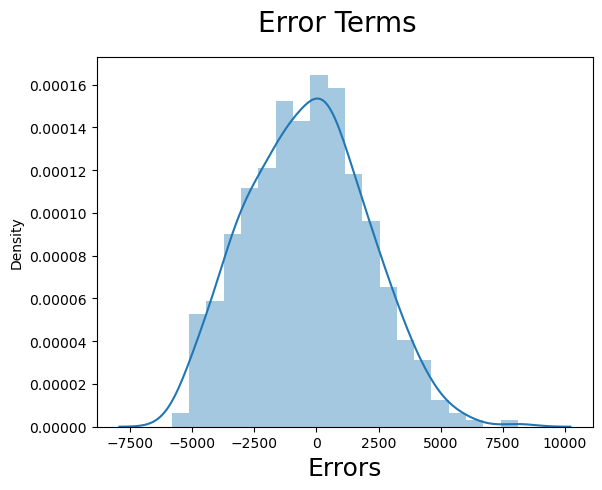

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [63]:
# The error terms from the graph seems to be normally distributed around the mean of error equal to zero.
# So the residual analysis signify that the model obtained (model 3) is a valid linear regression model

In [64]:
# Now we will use the model to make predictions on the test data set
# X_test_sm is already scaled, right columns selected and can be used in the obtained model for testing
# Making predictions
y_pred = res3.predict(X_test_sm)

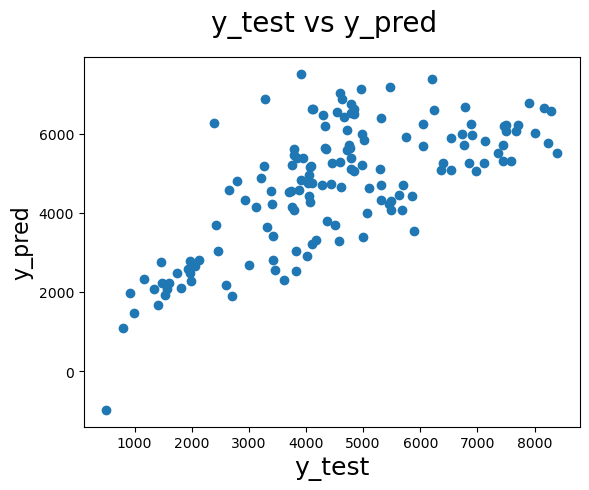

In [66]:
#Model evaluation on test data
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [67]:
# Predicting R-squared for the selected model on test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.45044088012699557